# DAta Loading & Merging


In [31]:
import pandas as pd

# Load datasets
fake = pd.read_csv("/content/Fake.csv")
real = pd.read_csv("/content/True.csv")

# Add label column: 0 = Fake, 1 = Real
fake['label'] = 0
real['label'] = 1

# Combine datasets
df = pd.concat([fake, real], axis=0).reset_index(drop=True)

# Drop unnecessary columns if needed
df.drop(columns=['date'], inplace=True)

print("Sample data:")
print(df.head())
print("Class distribution:\n", df['label'].value_counts())


Sample data:
                                               title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject  label  
0  Donald Trump just couldn t wish all Americans ...    News      0  
1  House Intelligence Committee Chairman Devin Nu...    News      0  
2  On Friday, it was revealed that former Milwauk...    News      0  
3  On Christmas day, Donald Trump announced that ...    News      0  
4  Pope Francis used his annual Christmas Day mes...    News      0  
Class distribution:
 label
0    23481
1    21417
Name: count, dtype: int64


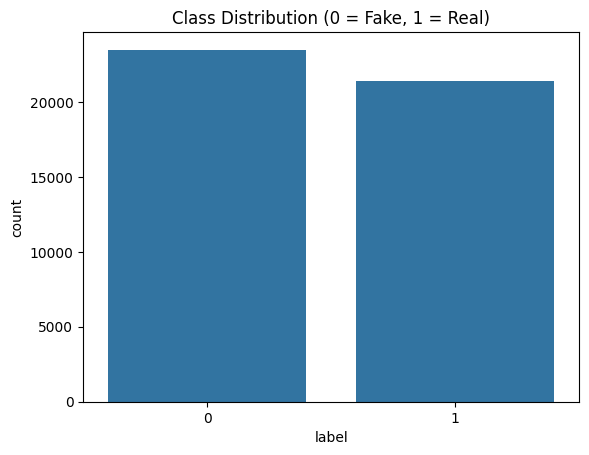

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='label')
plt.title('Class Distribution (0 = Fake, 1 = Real)')
plt.show()


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   label    44898 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 1.4+ MB


In [ ]:
df

,title,text,subject,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,0
...,...,...,...,...
44893,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,1
44894,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,1
44895,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,1
44896,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,1


#Data Cleaning

In [38]:
df

,title,text,subject,label,comnined_text
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,0,Donald Trump Sends Out Embarrassing New Year’...
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,0,Drunk Bragging Trump Staffer Started Russian ...
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,0,Sheriff David Clarke Becomes An Internet Joke...
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,0,Trump Is So Obsessed He Even Has Obama’s Name...
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,0,Pope Francis Just Called Out Donald Trump Dur...
...,...,...,...,...,...
44893,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,1,'Fully committed' NATO backs new U.S. approach...
44894,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,1,LexisNexis withdrew two products from Chinese ...
44895,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,1,Minsk cultural hub becomes haven from authorit...
44896,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,1,Vatican upbeat on possibility of Pope Francis ...


In [37]:
# comnbining text and title
df['comnined_text'] = df['title'] + ' ' + df['text']
df['comnined_text'].iloc[0]

' Donald Trump Sends Out Embarrassing New Year’s Eve Message; This is Disturbing Donald Trump just couldn t wish all Americans a Happy New Year and leave it at that. Instead, he had to give a shout out to his enemies, haters and  the very dishonest fake news media.  The former reality show star had just one job to do and he couldn t do it. As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year,  President Angry Pants tweeted.  2018 will be a great year for America! As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year. 2018 will be a great year for America!  Donald J. Trump (@realDonaldTrump) December 31, 2017Trump s tweet went down about as welll as you d expect.What kind of president sends a New Year s greeting like this 

In [39]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

In [40]:
import time


# Download NLTK resources
nltk.download('stopwords')

# Initialize stopwords and stemmer
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

# === Cleaning Function ===
def clean_text(text, use_stemming=True):
    text = text.lower()
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)  # remove URLs
    text = re.sub(r'[^a-zA-Z]', ' ', text)              # remove punctuation/digits
    words = text.split()
    if use_stemming:
        words = [stemmer.stem(word) for word in words if word not in stop_words]
    else:
        words = [word for word in words if word not in stop_words]
    return ' '.join(words)

# === Time the cleaning ===
start = time.time()

# Use `.map()` or swifter if installed
df['cleaned_text'] = df['comnined_text'].map(lambda x: clean_text(x, use_stemming=True))

end = time.time()
print(f"✅ Cleaning completed in {end - start:.2f} seconds")
print(df[['text', 'cleaned_text']].head())

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


✅ Cleaning completed in 211.26 seconds
                                                text  \
0  Donald Trump just couldn t wish all Americans ...   
1  House Intelligence Committee Chairman Devin Nu...   
2  On Friday, it was revealed that former Milwauk...   
3  On Christmas day, Donald Trump announced that ...   
4  Pope Francis used his annual Christmas Day mes...   

                                        cleaned_text  
0  donald trump send embarrass new year eve messa...  
1  drunk brag trump staffer start russian collus ...  
2  sheriff david clark becom internet joke threat...  
3  trump obsess even obama name code websit imag ...  
4  pope franci call donald trump christma speech ...  


In [41]:
df.sample(10)

,title,text,subject,label,comnined_text,cleaned_text
735,Trump’s Approval Rating Takes Game-Changing T...,Donald Trump s approval rating continues to pl...,News,0,Trump’s Approval Rating Takes Game-Changing T...,trump approv rate take game chang turn pro tru...
4372,"Obama Girls Are Going To Be Bridesmaids, So C...","Good news, everyone! Michelle Obama s former a...",News,0,"Obama Girls Are Going To Be Bridesmaids, So C...",obama girl go bridesmaid conserv call n screen...
37304,Factbox: Proposals of main parties in Honduras...,TEGUCIGALPA (Reuters) - Hondurans vote on Sund...,worldnews,1,Factbox: Proposals of main parties in Honduras...,factbox propos main parti hondura presidenti e...
31666,U.S. tech firms urge Congress to allow interne...,WASHINGTON (Reuters) - Major technology compan...,politicsNews,1,U.S. tech firms urge Congress to allow interne...,u tech firm urg congress allow internet domain...
23578,Trump on Twitter (Dec 18) - Congressional Race...,The following statements were posted to the ve...,politicsNews,1,Trump on Twitter (Dec 18) - Congressional Race...,trump twitter dec congression race train accid...
25813,"Trump, frustrated by Afghan war, suggests firi...",WASHINGTON (Reuters) - President Donald Trump...,politicsNews,1,"Trump, frustrated by Afghan war, suggests firi...",trump frustrat afghan war suggest fire u comma...
4291,Giuliani’s PATHETIC Excuse For Trump’s Braggi...,A tape featuring Donald Trump proudly boasting...,News,0,Giuliani’s PATHETIC Excuse For Trump’s Braggi...,giuliani pathet excus trump brag sexual assaul...
31173,Donald Trump's Hollywood Walk of Fame star van...,LOS ANGELES (Reuters) - Donald Trump’s star on...,politicsNews,1,Donald Trump's Hollywood Walk of Fame star van...,donald trump hollywood walk fame star vandal v...
832,Are Trump Supporters Too Dumb To Know They’re...,How the hell can anybody call themselves intel...,News,0,Are Trump Supporters Too Dumb To Know They’re...,trump support dumb know dumb scienc say probab...
29048,Canada foreign minister will oppose U.S. borde...,WASHINGTON (Reuters) - Canada opposes the idea...,politicsNews,1,Canada foreign minister will oppose U.S. borde...,canada foreign minist oppos u border tariff wa...


<Axes: xlabel='subject'>

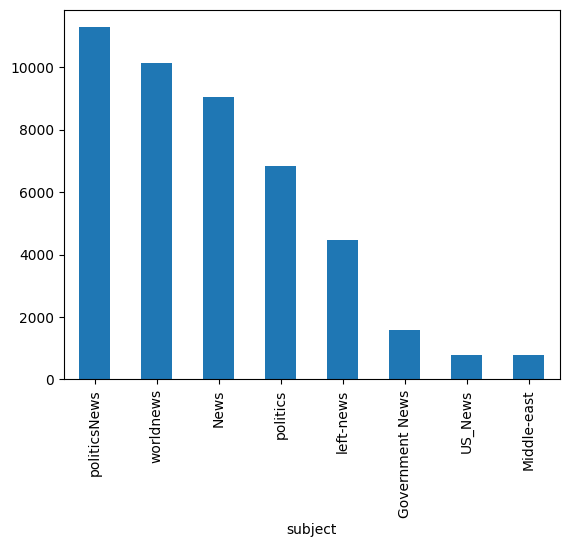

In [46]:
df['subject'].value_counts().plot(kind='bar')

In [ ]:
true_sample=df[df['label']==1]

In [42]:
true_sample['text'].iloc[0]

'WASHINGTON (Reuters) - The head of a conservative Republican faction in the U.S. Congress, who voted this month for a huge expansion of the national debt to pay for tax cuts, called himself a “fiscal conservative” on Sunday and urged budget restraint in 2018. In keeping with a sharp pivot under way among Republicans, U.S. Representative Mark Meadows, speaking on CBS’ “Face the Nation,” drew a hard line on federal spending, which lawmakers are bracing to do battle over in January. When they return from the holidays on Wednesday, lawmakers will begin trying to pass a federal budget in a fight likely to be linked to other issues, such as immigration policy, even as the November congressional election campaigns approach in which Republicans will seek to keep control of Congress. President Donald Trump and his Republicans want a big budget increase in military spending, while Democrats also want proportional increases for non-defense “discretionary” spending on programs that support educat

In [43]:
df[['text','cleaned_text']]

,text,cleaned_text
0,Donald Trump just couldn t wish all Americans ...,donald trump send embarrass new year eve messa...
1,House Intelligence Committee Chairman Devin Nu...,drunk brag trump staffer start russian collus ...
2,"On Friday, it was revealed that former Milwauk...",sheriff david clark becom internet joke threat...
3,"On Christmas day, Donald Trump announced that ...",trump obsess even obama name code websit imag ...
4,Pope Francis used his annual Christmas Day mes...,pope franci call donald trump christma speech ...
...,...,...
44893,BRUSSELS (Reuters) - NATO allies on Tuesday we...,fulli commit nato back new u approach afghanis...
44894,"LONDON (Reuters) - LexisNexis, a provider of l...",lexisnexi withdrew two product chines market l...
44895,MINSK (Reuters) - In the shadow of disused Sov...,minsk cultur hub becom author minsk reuter sha...
44896,MOSCOW (Reuters) - Vatican Secretary of State ...,vatican upbeat possibl pope franci visit russi...


# Represnting Each Word In The Form Of 5000 Dim Vector Using Tfidf

#Data Split For Testing & Validation & Vectorization


In [47]:
from sklearn.model_selection import train_test_split

X = df['cleaned_text']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

from sklearn.feature_extraction.text import TfidfVectorizer


vectorizer = TfidfVectorizer(max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)


In [51]:
X_train_vec.shape, df.shape

((35918, 5000), (44898, 6))

#Model Training


In [72]:
from sklearn.linear_model import LogisticRegression

# 👇 Using class_weight='balanced' to reduce bias


model = LogisticRegression(class_weight='balanced', penalty='l2', C=1.0, max_iter=5000)

model.fit(X_train_vec, y_train)


print("Model training complete.")


Model training complete.


#Evaluation & Confusion Matrix

In [75]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = model.predict(X_test_vec)

print(classification_report(y_test, y_pred, target_names=["Fake", "Real"]))

# Confusion Matrix
print("accuracy_score",":",accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

        Fake       0.99      0.98      0.99      4696
        Real       0.98      0.99      0.99      4284

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980

accuracy_score : 0.9863028953229399


In [ ]:
!pip install mlxtend


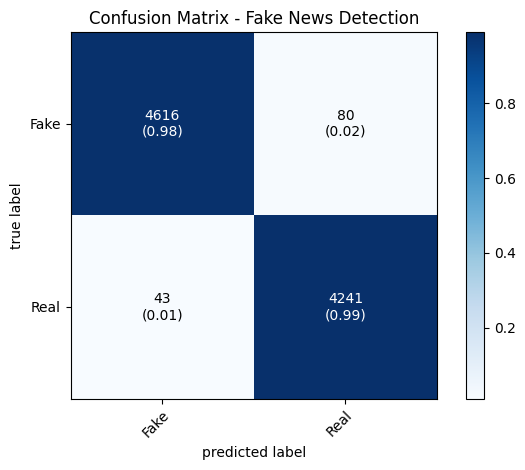

In [76]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
fig, ax = plot_confusion_matrix(conf_mat=cm,
                                 class_names=["Fake", "Real"],
                                 show_absolute=True,
                                 show_normed=True,
                                 colorbar=True)
plt.title("Confusion Matrix - Fake News Detection")
plt.tight_layout()
plt.show()


##Prediction Time

In [81]:
sample = ["Hurricane Iris, now a Category 3 storm, made landfall on Florida’s Gulf Coast early Tuesday. Over 200,000 residents have evacuated amid flooding and power outages. FEMA has deployed emergency response teams to the region."]
clean = clean_text(sample[0])
vec = vectorizer.transform([clean])
pred = model.predict(vec)[0]
prob = model.predict_proba(vec)

print("Prediction:", "Real" if pred == 1 else "Fake")
print("Confidence:", round(max(prob[0]) * 100, 2), "%")

Prediction: Real
Confidence: 84.79 %


#Model packing


In [82]:
import pickle

# Save the trained model
with open("model.pkl", "wb") as f:
    pickle.dump(model, f)

# Save the TF-IDF vectorizer
with open("vectorizer.pkl", "wb") as f:
    pickle.dump(vectorizer, f)

print("Model and vectorizer saved successfully.")


Model and vectorizer saved successfully.
